In [246]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [247]:
delivery = pd.read_csv('ipl2020.csv')
delivery = delivery.drop(delivery.columns[0], axis=1)
matches = pd.read_csv('matches_2020.csv')
matches = matches.drop(matches.columns[0], axis=1)

In [248]:
delivery.fillna(0, inplace=True)
delivery['player_dismissed'] = delivery['player_dismissed'].apply(lambda x: 0 if x==0 else 1)

delivery['batsman_run'] = delivery['batsman_run'].apply(lambda x: x-1 if ((x==7) or (x==5)) else x)

In [249]:
def clean(row):
    if row['extra_runs']>= row['batsman_run']:
        row['extra_runs'] -= row['batsman_run']
        
    return row

delivery = delivery.apply(clean, axis=1)
delivery['total_runs'] = delivery['extra_runs'] + delivery['batsman_run']

In [250]:
def what_first(row):
    option = ['bat', 'field']
    if row['toss_winner']==row['winner']:
        return row['toss_decision']
    else:
        option.remove(row['toss_decision'])
        return option[0]

In [251]:
first = list()
for i in range(0, len(matches)):
    first.append(what_first(matches.iloc[i]))
    
matches['Winning_team_first_inning'] = first

In [252]:
delivery['balls'] = delivery['overs']
delivery['overs'] = delivery['overs'].apply(lambda x: math.ceil(x))
delivery.head()

,date,overs,batting_team,bowling_team,batsman,non-striker,bowler,batsman_run,extra_runs,total_runs,player_dismissed,dismissed_batsman,kind,venue,balls
0,2020-11-02,1,Royal Challengers Bangalore,Delhi Capitals,JR Philippe,D Padikkal,DR Sams,0,0,0,0,0,0,Sheikh Zayed Stadium,0.1
1,2020-11-02,1,Royal Challengers Bangalore,Delhi Capitals,JR Philippe,D Padikkal,DR Sams,1,0,1,0,0,0,Sheikh Zayed Stadium,0.2
2,2020-11-02,1,Royal Challengers Bangalore,Delhi Capitals,D Padikkal,JR Philippe,DR Sams,1,0,1,0,0,0,Sheikh Zayed Stadium,0.3
3,2020-11-02,1,Royal Challengers Bangalore,Delhi Capitals,JR Philippe,D Padikkal,DR Sams,2,0,2,0,0,0,Sheikh Zayed Stadium,0.4
4,2020-11-02,1,Royal Challengers Bangalore,Delhi Capitals,JR Philippe,D Padikkal,DR Sams,0,0,0,0,0,0,Sheikh Zayed Stadium,0.5


# Teams & Players

In [253]:
team_1 = 'Mumbai Indians'
team_2 = 'Delhi Capitals'

In [254]:
mi_team = ['Q de Kock', 'SA Yadav', 'RG Sharma', 'Ishan Kishan', 'KH Pandya', 'HH Pandya', 'KA Pollard', 'JL Pattinson', 'TA Boult', 'RD Chahar', 'JJ Bumrah']
dc_team = ['PP Shaw', 'S Dhawan','SS Iyer', 'RR Pant' ,'SO Hetmyer','A Nortje', 'TU Deshpande', 'K Rabada', 'R Ashwin', 'AR Patel', 'MP Stoinis']

# Toss decision

In [255]:
di_stadium = matches[(matches['match_venue']=='Dubai International Cricket Stadium')]
di_stadium.head(3)

,dates,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,match_venue,Winning_team_first_inning
2,2020-11-01,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,field,Kolkata Knight Riders,60,0,Dubai International Cricket Stadium,bat
4,2020-10-31,Delhi Capitals,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,0,9,Dubai International Cricket Stadium,field
6,2020-10-29,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,0,6,Dubai International Cricket Stadium,field


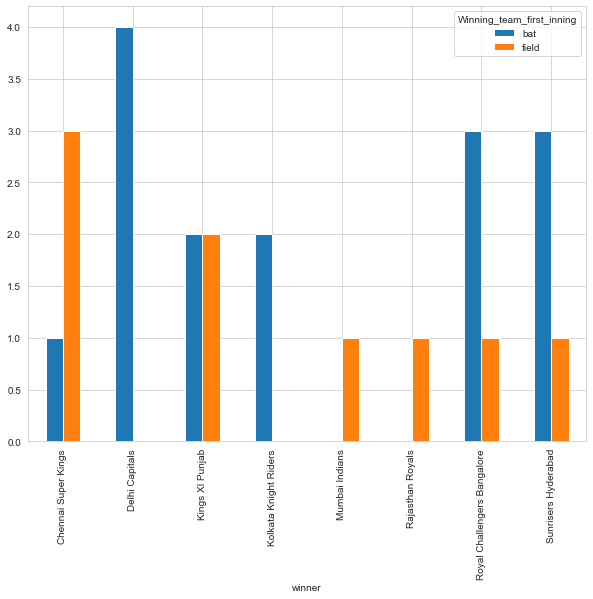

In [256]:
pd.crosstab(index=di_stadium.winner, columns=di_stadium.Winning_team_first_inning).plot(kind='bar', figsize=(10,8))

# Target to Set

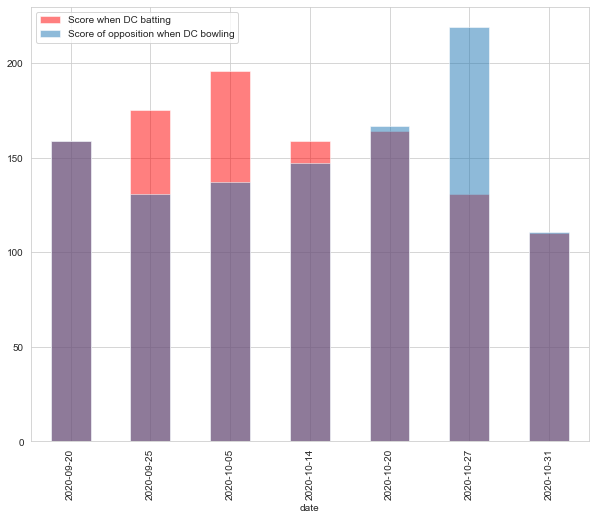

In [257]:
di_matches = delivery[(delivery['date'].isin(di_stadium_team['dates'].unique())) & (delivery['venue']=='Dubai International Cricket Stadium')]
plt.figure(figsize=(10,8))

di_matches[di_matches['batting_team']==team_2].groupby('date').sum()['total_runs'].plot(kind='bar', alpha=0.5, label='Score when DC batting', color='red')
di_matches[di_matches['bowling_team']==team_2].groupby('date').sum()['total_runs'].plot(kind='bar', alpha=0.5, label='Score of opposition when DC bowling')
plt.legend()


# Target to Chase

In [258]:
describe_dc

count      6.000000
mean     183.500000
std       26.113215
min      159.000000
25%      163.000000
50%      179.500000
75%      193.000000
max      228.000000
Name: total_runs, dtype: float64

Text(5, 173.25, 'Mean Percentile Winnning Target: 171.25')

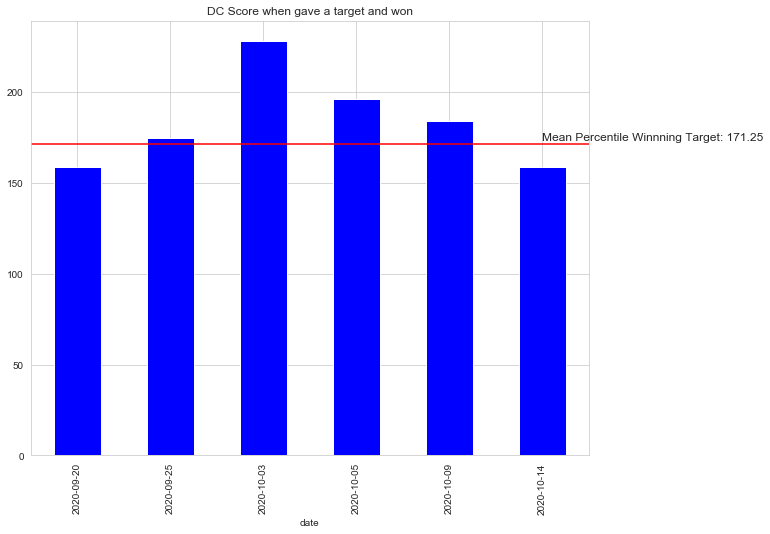

In [259]:
dc_wins = matches[(matches['winner']==team_2) & ((matches['team1']==team_2) | (matches['team2']==team_2))]
dc_wins_date = list(dc_wins[dc_wins['Winning_team_first_inning']=='bat']['dates'])
dc_win_bat_match = delivery[(delivery['date'].isin(dc_wins_date)) & (delivery['batting_team']==team_2)]
dc_win_bat_match.groupby('date').sum()['total_runs'].plot(kind='bar', color='blue', figsize=(10,8))
describe_dc = dc_win_bat_match.groupby('date').sum()['total_runs'].describe()
plt.title("DC Score when gave a target and won")
plt.axhline(y=describe_dc[4:6].mean(), color='red')
plt.text(x=5, y=describe_dc[4:6].mean()+2, s='Mean Percentile Winnning Target: {}'.format(describe_dc[4:6].mean()), fontsize=12)

# Bowl to Batsman

In [260]:
today_match = delivery[(delivery['batting_team'].isin([team_1, team_2])) & (delivery['bowling_team'].isin([team_1, team_2]))]

In [261]:
for batsman in (mi_team+dc_team):
    bowler_dismissed = today_match[(today_match['batsman']==batsman) & (today_match['player_dismissed']==1)]
    if len(bowler_dismissed)!= 0:
        print(batsman)
        print(bowler_dismissed[['bowler', 'kind']])
        print('----------------')

Q de Kock
        bowler    kind
1120  A Nortje  bowled
7122  R Ashwin  caught
----------------
SA Yadav
        bowler    kind
7155  K Rabada  caught
----------------
RG Sharma
        bowler    kind
7093  AR Patel  caught
----------------
Ishan Kishan
        bowler    kind
7171  K Rabada  caught
----------------
HH Pandya
          bowler    kind
7157  MP Stoinis  caught
----------------
PP Shaw
        bowler    kind
954   TA Boult  caught
6940  TA Boult  caught
----------------
S Dhawan
       bowler    kind
938  TA Boult  caught
----------------
SS Iyer
         bowler     kind
998   RD Chahar  stumped
7028  KH Pandya   caught
----------------
RR Pant
         bowler kind
1006  JJ Bumrah  lbw
----------------
SO Hetmyer
               bowler    kind
1029  NM Coulter-Nile  caught
----------------
K Rabada
         bowler     kind
1057  JJ Bumrah  run out
----------------
R Ashwin
        bowler    kind
1046  TA Boult  caught
----------------
MP Stoinis
         bowler     kind
100

# Key Players

Text(0.5, 1.0, 'Wickets in Dubai Cricket Stadium by DC bowlers')

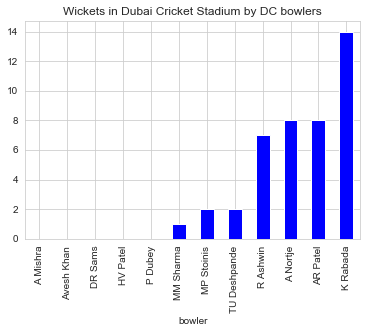

In [262]:
di_matches[di_matches['bowling_team']==team_2].groupby('bowler').sum()['player_dismissed'].sort_values().plot(kind='bar', color='blue')
plt.title("Wickets in Dubai Cricket Stadium by DC bowlers")

Text(0.5, 1.0, 'Wickets in Dubai Cricket Stadium by MI bowlers')

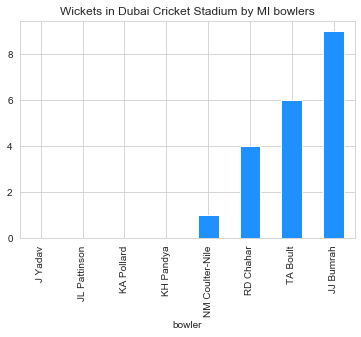

In [263]:
di_matches[di_matches['bowling_team']==team_1].groupby('bowler').sum()['player_dismissed'].sort_values().plot(kind='bar', color='dodgerblue')
plt.title("Wickets in Dubai Cricket Stadium by MI bowlers")

Text(0.5, 1.0, 'Batsman Runs in Dubai Cricket Stadium by DC batsman')

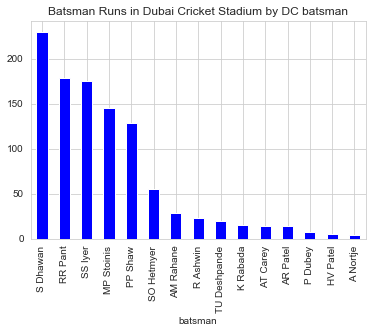

In [264]:
di_matches[di_matches['batting_team']==team_2].groupby('batsman').sum()['batsman_run'].sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title("Batsman Runs in Dubai Cricket Stadium by DC batsman")

Text(0.5, 1.0, 'Batsman Runs in Dubai Cricket Stadium by MI batsman')

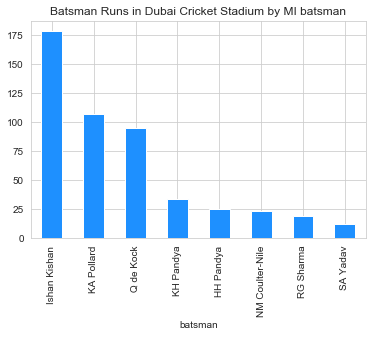

In [265]:
di_matches[di_matches['batting_team']==team_1].groupby('batsman').sum()['batsman_run'].sort_values(ascending=False).plot(kind='bar', color='dodgerblue')
plt.title("Batsman Runs in Dubai Cricket Stadium by MI batsman")

In [266]:
dc_lost_date_bat_first = matches[(matches['winner']!=team_2) & (matches['Winning_team_first_inning']=='field') & ((matches['team1']==team_2) | (matches['team2']==team_2))]['dates']
dc_lost_date_field_first = matches[(matches['winner']!=team_2) & (matches['Winning_team_first_inning']=='bat') & ((matches['team1']==team_2) | (matches['team2']==team_2))]['dates']
dc_lost_bat_first = delivery[(delivery['date'].isin(dc_lost_date_bat_first))]
dc_lost_field_first = delivery[(delivery['date'].isin(dc_lost_date_field_first))]

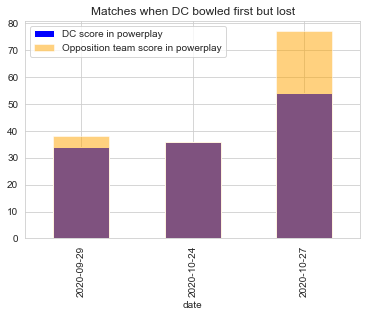

In [273]:
dc_lost_field_first[(dc_lost_field_first['overs']<=6) & (dc_lost_field_first['batting_team']==team_2)].groupby('date').sum()['total_runs'].plot(kind='bar', color='blue', label='DC score in powerplay')
dc_lost_field_first[(dc_lost_field_first['overs']<=6) & (dc_lost_field_first['bowling_team']==team_2)].groupby('date').sum()['total_runs'].plot(kind='bar', color='orange', alpha=0.5, label='Opposition team score in powerplay')
plt.title("Matches when DC bowled first but lost")
plt.legend()

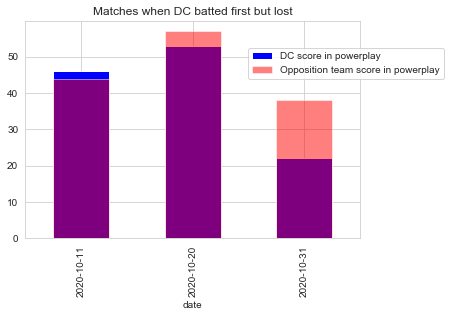

In [274]:
dc_lost_bat_first[(dc_lost_bat_first['overs']<=6) & (dc_lost_bat_first['batting_team']==team_2)].groupby('date').sum()['total_runs'].plot(kind='bar', color='blue', label='DC score in powerplay')
dc_lost_bat_first[(dc_lost_bat_first['overs']<=6) & (dc_lost_bat_first['bowling_team']==team_2)].groupby('date').sum()['total_runs'].plot(kind='bar', color='red', alpha=0.5, label='Opposition team score in powerplay')
plt.title("Matches when DC batted first but lost")
plt.legend(bbox_to_anchor=(0.65,0.9))

Text(0.5, 1.0, 'Wickets Fall of DC when DC bowled first but lost')

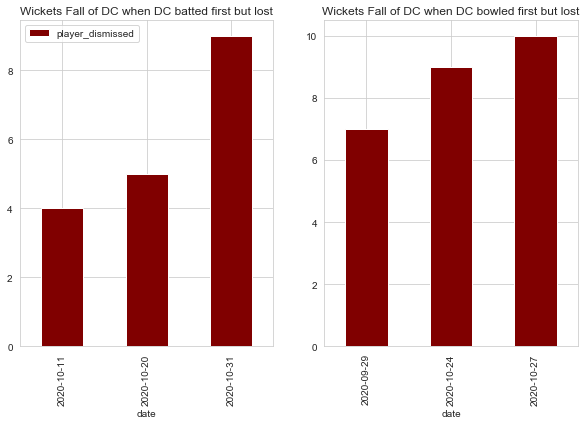

In [269]:
fig, ax = plt.subplots(1, 2, figsize=(10,6))
dc_lost_bat_first[(dc_lost_bat_first['player_dismissed']==1) & (dc_lost_bat_first['batting_team']==team_2)].groupby('date').sum()['player_dismissed'].plot(kind='bar',  color='maroon', ax=ax[0])
ax[0].legend()
ax[0].set_title("Wickets Fall of DC when DC batted first but lost")
dc_lost_field_first[(dc_lost_field_first['player_dismissed']==1) & (dc_lost_field_first['batting_team']==team_2)].groupby(['date']).sum()['player_dismissed'].plot(kind='bar', color='maroon', ax=ax[1])
ax[1].set_title("Wickets Fall of DC when DC bowled first but lost")

In [270]:
dc_win_date_field_first = matches[(matches['winner']==team_2) & (matches['Winning_team_first_inning']=='field') & ((matches['team1']==team_2) | (matches['team2']==team_2))]['dates']
dc_win_date_bat_first = matches[(matches['winner']==team_2) & (matches['Winning_team_first_inning']=='bat') & ((matches['team1']==team_2) | (matches['team2']==team_2))]['dates']
dc_win_field_first = delivery[(delivery['date'].isin(dc_win_date_field_first))]
dc_win_bat_first = delivery[(delivery['date'].isin(dc_win_date_bat_first))]

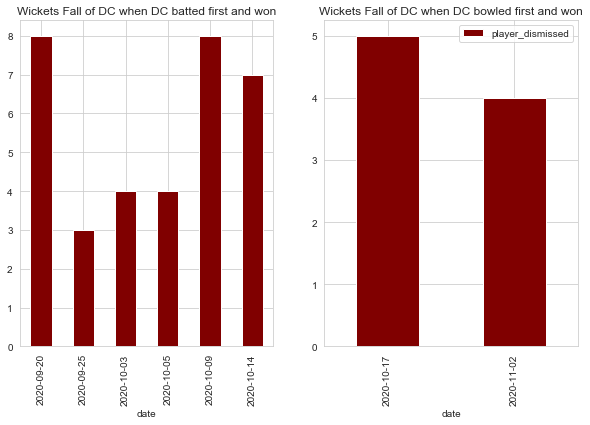

In [271]:
fig, ax = plt.subplots(1, 2, figsize=(10,6))
dc_win_bat_first[(dc_win_bat_first['player_dismissed']==1) & (dc_win_bat_first['batting_team']==team_2)].groupby('date').sum()['player_dismissed'].plot(kind='bar',  color='maroon', ax=ax[0])

ax[0].set_title("Wickets Fall of DC when DC batted first and won")
dc_win_field_first[(dc_win_field_first['player_dismissed']==1) & (dc_win_field_first['batting_team']==team_2)].groupby(['date']).sum()['player_dismissed'].plot(kind='bar', color='maroon', ax=ax[1])
ax[1].set_title("Wickets Fall of DC when DC bowled first and won")
ax[1].legend()